## **06-05 로지스틱 회귀(Logistic Regression)**

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 로지스틱 회귀에서 시그모이드 함수 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/22881

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 합니다. 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다.

### **1. 이진 분류(Binary Classification)**

앞서 선형 회귀를 설명하며 공부 시간과 성적 간의 관계를 직선의 방정식으로 표현한다는 가설 하에, 주어진 데이터로부터 가중치 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
와 편향 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>b</mi>
</math>
를 찾아 데이터를 가장 잘 표현하는 직선을 찾았습니다. 그런데 이번에 배울 둘 중 하나의 선택지 중에서 정답을 고르는 이진 분류 문제는 직선으로 표현하는 것이 적절하지 않습니다.

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해봅시다. 시험 성적이 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
라면, 합불 결과는 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
입니다. 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

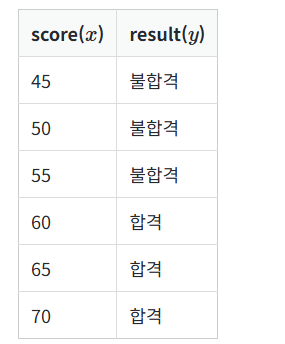  
위 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같습니다.

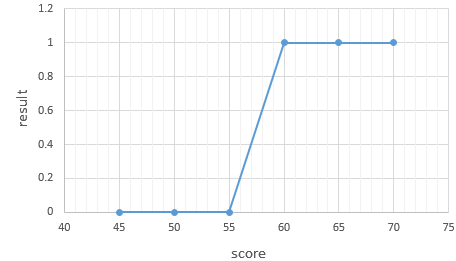

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다. 이러한 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>x</mi>
</math>
와 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요합니다. 직선을 사용할 경우 보통 분류 작업이 제대로 동작하지 않습니다.


이번 예제의 경우 실제값. 즉, 레이블에 해당하는 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
가 0 또는 1이라는 두 가지 값만을 가지므로, 이 문제를 풀기 위해서 예측값은 0과 1사이의 값을 가지도록 합니다. 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이해집니다. 최종 예측값이 0.5보다 작으면 0으로 예측했다고 판단하고, 0.5보다 크면 1로 예측했다고 판단합니다. 만약 $y=wx+b$
의 직선을 사용할 경우, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
값이 음의 무한대부터 양의 무한대와 같은 큰 수들도 가질 수 있는데 이는 직선이 분류 문제에 적합하지 않은 두번째 이유입니다.

출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수로 시그모이드 함수(Sigmoid function)가 있습니다.

### **2. 시그모이드 함수(Sigmoid function)**

시그모이드 함수는 종종 σ로 축약해서 표현하기도 합니다. 로지스틱 회귀를 풀기 위한 가설을 세워봅시다.

 $$H(x) = \frac{1}{1 + e^{-(wx + b)}} = sigmoid(wx + b) = σ(wx + b)$$

여기서 e(e=2.718281...)는 자연 상수라 불리는 숫자입니다. 여기서 구해야할 것은 여전히 주어진 데이터에 가장 적합한 가중치 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
(weight)와 편향 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>b</mi>
</math>
(bias)입니다. 인공 지능 알고리즘이 하는 것은 결국 주어진 데이터에 적합한 가중치 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
와 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>b</mi>
</math>
를 구하는 것입니다.

시그모이드 함수를 그래프로 시각화해봅시다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

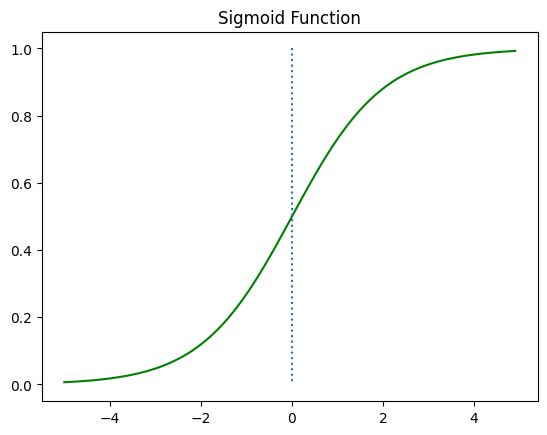

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프에서 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환합니다. 마치 S자의 모양을 연상시킵니다. 
x가 0일 때 출력값은 0.5의 값을 가집니다. 
x가 증가하면 1에 수렴합니다. 가중치 w와 편향 b이 출력값에 어떤 영향을 미치는지 시각화를 통해 알아보겠습니다. 우선 w의 값을 변화시키고 이에 따른 그래프를 확인해봅시다.

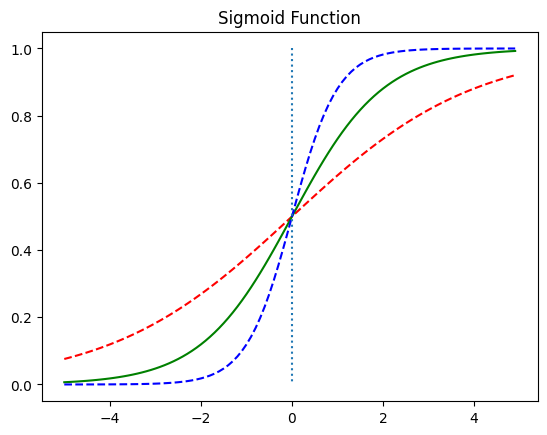

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값이 0.5일때 빨간색선, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값이 1일때는 초록색선, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값이 2일때 파란색선이 나오도록 하였습니다. <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값에 따라 그래프의 경사도가 변합니다. 선형 회귀에서 직선을 표현할 때, 가중치 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
는 직선의 기울기를 의미했지만 여기서는 그래프의 경사도를 결정합니다. <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값이 커지면 경사가 커지고 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math>
의 값이 작아지면 경사가 작아집니다.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>b</mi>
</math>
의 값에 따라서 그래프가 어떻게 변하는지 보겠습니다.

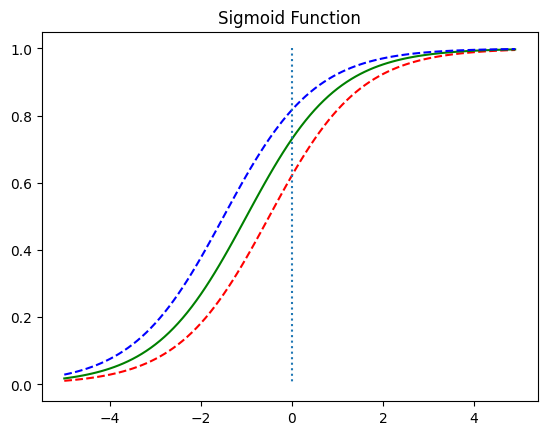

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0, 0],[1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>b</mi>
</math>
값에 따라서 그래프가 이동하는 것을 보여줍니다. 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴합니다. 0부터의 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제를 풀기 위해서 사용할 수 있습니다.

### **3. 비용 함수(Cost function)**

로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 w를 찾아내지만, 비용 함수로는 평균 제곱 오차를 사용하지 않습니다. 평균 제곱 오차를 로지스틱 회귀의 비용 함수로 사용했을 때는 좋지 않은 로컬 미니멈에 빠질 가능성이 지나치게 높아 문제 해결이 어렵습니다.

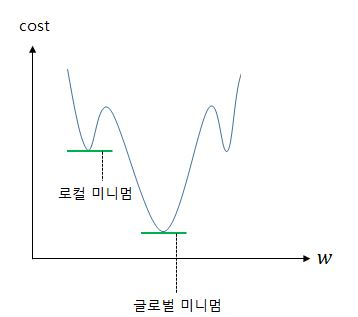

로지스틱 회귀에서 평균 제곱 오차를 비용 함수로 사용하면, 경사 하강법을 사용하였을때 찾고자 하는 최소값이 아닌 잘못된 최소값에 빠질 가능성이 매우 높습니다. 이를 전체 함수에 걸쳐 최소값인 **글로벌 미니멈(Global Minimum)** 이 아닌 특정 구역에서의 최소값인 **로컬 미니멈(Local Minimum)** 에 도달했다고 합니다. 로컬 미니멈에 지나치게 쉽게 빠지는 비용 함수는 cost가 가능한한 최소가 되는 가중치 w
를 찾는다는 목적에는 좋지 않은 선택입니니다. 그리고 로지스틱 회귀에서의 평균 제곱 오차는 바로 그 좋지 않은 선택에 해당합니다.

로지스틱 회귀라는 문제에서 가중치 w를 최소로 만드는 적절한 새로운 비용 함수를 찾아야 합니다. 가중치를 최소화하는 아래의 어떤 함수를 목적 함수라고 합시다. J는 목적 함수(objective function)를 의미합니다.

$$J(w) = \frac{1}{n} \sum_{i=1}^{n} f\left(H(x^{(i)}), y^{(i)}\right)$$

아직 완성된 식이 아닙니다. 위의 식에서 샘플 데이터의 개수가 n개이고, 어떤 함수 f가 실제값 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
    </mrow>
  </msub>
</math>
와 예측값 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
</math>
의 오차를 나타내는 함수라고 할 때, 여기서 새로운 함수 f를 어떻게 정의하느냐에 따라서 가중치를 최소화하는 적절한 목적 함수가 완성됩니다. 목적 함수는 전체 데이터에 대해서 어떤 함수 f
의 값의 평균을 계산하고 있습니다. 적절한 가중치를 찾기 위해서 결과적으로 실제값과 예측값에 대한 오차를 줄여야 하므로 여기서 이 f
는 비용 함수(cost function)라고 하겠습니다. 식을 다시 쓰면 아래와 같습니다.

$$J(w) = \frac{1}{n} \sum_{i=1}^{n} cost\left(H(x^{(i)}), y^{(i)})\right)$$

시그모이드 함수는 0과 1사이의 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>값을 반환합니다. 이는 실제값이 0일 때 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>값이 1에 가까워지면 오차가 커지며 실제값이 1일 때 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>값이 0에 가까워지면 오차가 커짐을 의미합니다. 그리고 이를 반영할 수 있는 함수는 로그 함수를 통해 표현 가능합니다.

$$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$$
$$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$$

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>의 실제값이 1일 때 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo>&#x2212;</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
 그래프를 사용하고 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>의 실제값이 0일 때 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo>&#x2212;</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>
 그래프를 사용해야 합니다. 위의 두 식을 그래프 상으로 표현하면 아래와 같습니다.

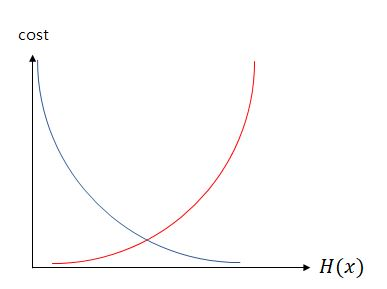

실제값 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>가 1일 때의 그래프를 파란색 선으로 표현하였으며, 실제값 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>
가 0일 때의 그래프를 빨간색 선으로 표현하였습니다. 위의 그래프를 간략히 설명하면, 실제값이 1일 때, 예측값인 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다. 반면, 실제값이 1일 때, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 이는 다음과 같이 하나의 식으로 표현할 수 있습니다.

$$\text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$$

자세히 보면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>와 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
</math>
가 식 중간에 들어갔고, 두 개의 식을 -로 묶은 것 외에는 기존의 두 식이 들어가있는 것을 볼 수 있습니다. 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>가 0이면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
가 없어지고, 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>가 1이면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>
가 없어지는데 이는 각각 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>가 1일 때와 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
</math>가 0일 때의 앞서 본 식과 동일합니다.

결과적으로 로지스틱 회귀의 목적 함수는 아래와 같습니다.

$$J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$$

이때 로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피(Cross Entropy)함수라고 합니다. 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하며, 가중치를 찾기 위해서 크로스 엔트로피 함수의 평균을 취한 함수를 사용합니다. 크로스 엔트로피 함수는 소프트맥스 회귀의 비용 함수이기도 하므로 뒤에서 재언급합니다.

마지막 편집일시 : 2022년 11월 14일 2:48 오후